<a href="https://colab.research.google.com/github/statisthong/kaggle-titanic/blob/main/8%EC%9B%9416%EC%9D%BC(3%EC%9D%BC%EC%B0%A8_%EC%88%98%EC%97%85%EC%9A%A9)_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89(%EB%8D%B0%EC%9D%B4%EC%BD%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 생존분석


In [113]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

3일차 수업 목표

*   CRISPDM : 업무의 이해 > 데이터의 이해 > 데이터 준비 > 모델링 > 평가 > 전개

1. 데이터의 이해 : EDA(Exploratory Data Analytics)
2. 데이터 준비 : NA 처리, Mapping, Feature selection, Feature Engineering, Scale, Normalization
3. 모델링 : 분류나무
4. 평가 : 정확도, 정오분류표, ROC







## 1.   데이터의 이해 : EDA(Exploratory Data Analytics)



In [114]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [115]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/a/af/TitanicRoute.svg")

### Package import

In [3]:
import pandas as pd # DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [4]:
train = pd.read_csv('/content/drive/MyDrive/train.csv') # 모델 학습 파일
test = pd.read_csv('/content/drive/MyDrive/test.csv')  # 모델 테스트 파일
submission = pd.read_csv('/content/drive/MyDrive/submission.csv') # Kaggle에 제출할 샘플 파일

In [3]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train_test = train.dropna() # Cabin 열을 모두 na로 만듬

In [5]:
train_test.shape

(183, 12)

In [121]:
train.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [122]:
train_test.shape

(183, 12)

In [123]:
train['Age'].isnull().sum()

177

In [124]:
train.head() # 데이터 프레임을 위에서 n개 행만큼 보여주는 함수, 기본값 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [126]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


* PassengerId : 탐승객의 고유 아이디
* Survived : 생존여부(0: 사망, 1: 생존)
* Pclass : 갤실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
* Name : 이름
* Age : 나이
* SibSp : 함께 탑승한 형제, 자매, 아내, 남편의 수
* Parch : 함께 탐습한 부모, 자녀의 수
* Ticket : 티켓번호
* Fare : 티켓의 요금
* Cabin : 객실번호
* Embarked : 탑승한 항구 위치(C = Cherbourg, Q = Queenstown, S = Southampton)


In [127]:
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


### pd.DataFrame.tail()
* 데이터프레임의 아래에서 n개 행을 보여주는 함수, 기본값 5

In [128]:
train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [129]:
train[['Survived','Sex']]

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


In [10]:
train[train['Survived']==1][['Survived','Sex']]

,Survived,Sex
1,1,female
2,1,female
3,1,female
8,1,female
9,1,female
...,...,...
875,1,female
879,1,female
880,1,female
887,1,female


In [12]:
train[(train['Survived']==1) & (train['Pclass']==1)][['Survived','Sex']]

,Survived,Sex
1,1,female
3,1,female
11,1,female
23,1,male
31,1,female
...,...,...
862,1,female
871,1,female
879,1,female
887,1,female


In [130]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [131]:
train[['Cabin',	'Embarked']]

,Cabin,Embarked
0,NaN,S
1,C85,C
2,NaN,S
3,C123,S
4,NaN,S
...,...,...
886,NaN,S
887,B42,S
888,NaN,S
889,C148,C


### pd.DataFrame.shape
* 데이터 프레임의 행의 개수와 열의 개수가 저정되어 있는 속성(attribute)

In [132]:
train.shape

(891, 12)

In [133]:
print(train.shape)
print(test.shape)
print(submission.shape)

(891, 12)
(418, 11)
(418, 2)


### pd.DataFrame.info()
* 데이터의 column 별 정보
* 비어있지 않은 값(non-null)의 수
* column 의 type : int(정수), float(실수), object(문자열), date(날짜)

In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [135]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### pd.DataFrame.describe()
* 숫자형 column들의 통계량을 보여주는 함수 descriptive statistics
* count, mean, std, min, max, median, quantile

In [136]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


mean = average

In [137]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [138]:
train[['Pclass','Sex']].describe()

,Pclass
count,891.000000
mean,2.308642
std,0.836071
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


In [139]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### pd.Series.value_counts()
* series(데이터프레임에서 하나의 열) 내 원소 값들의 개수(빈도)를 보여주는 함수
* 가장 많이 나오는 원소 값들의 순서(빈도가 높은 순)대로 보여줌


In [140]:
train[['Embarked']].value_counts()

Embarked
S           644
C           168
Q            77
dtype: int64

* 다른 컬럼들에 있는 값들의 갯수를 각각 확인해보세요

In [141]:
#print(train.columns)
train[['Survived','Embarked']].value_counts()

Survived  Embarked
0         S           427
1         S           217
          C            93
0         C            75
          Q            47
1         Q            30
dtype: int64

In [142]:
train[['Survived', 'Sex', 'Pclass']].value_counts()

Survived  Sex     Pclass
0         male    3         300
                  2          91
1         female  1          91
0         male    1          77
          female  3          72
1         female  3          72
                  2          70
          male    3          47
                  1          45
                  2          17
0         female  2           6
                  1           3
dtype: int64

In [143]:
train[['Survived', 'Pclass']].value_counts()

Survived  Pclass
0         3         372
1         1         136
          3         119
0         2          97
1         2          87
0         1          80
dtype: int64

In [144]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


* pd.Series.unique()
* 해당 series에서 유일한 값들만 보여주는 함수
* nan도 출력됨

In [145]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [146]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [147]:
train[['Embarked']].nunique()

Embarked    3
dtype: int64

* 다른 컬럼들에 있는 값들의 유일한 원소의 값들을 각각 확인해보세요

### pd.DataFrame.groupby()
* 그룹별 통계함수

In [5]:
train.groupby(['Sex']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [149]:
xxx=train.groupby(['Sex', 'Pclass']).mean()

In [150]:
xxx

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

In [151]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [152]:
train['PassengerId'].nunique()

891

In [153]:
train.groupby(['Pclass']).mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [6]:
train.groupby(['Survived']).mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [155]:
train[['Sex', 'Pclass']].median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Pclass    3.0
dtype: float64

In [156]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
test['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

### pd.Series.plot(kind = "bar")
* 막대그래표
* index 값 : x 축, value : y 축
* value_counts, groupby 의 결과

In [158]:
train[['Survived', 'Sex']].value_counts()

Survived  Sex   
0         male      468
1         female    233
          male      109
0         female     81
dtype: int64

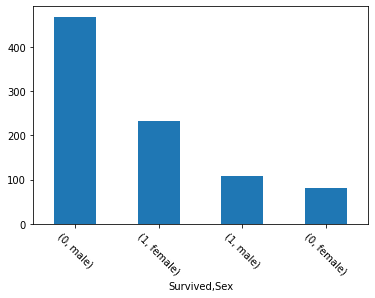

In [159]:
train[['Survived', 'Sex']].value_counts().plot(kind="bar", rot=-45)

In [160]:
train[['Survived', 'Age']].value_counts()

Survived  Age  
0         21.00    19
          28.00    18
          25.00    17
          18.00    17
          22.00    16
                   ..
1         0.42      1
          0.67      1
          0.92      1
          7.00      1
          80.00     1
Length: 142, dtype: int64

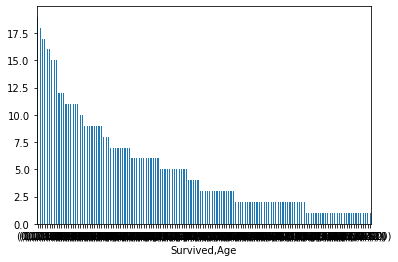

In [161]:
train[['Survived', 'Age']].value_counts().plot(kind="bar", rot = 0)

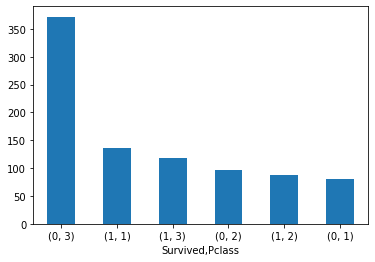

In [162]:
train[['Survived', 'Pclass']].value_counts().plot(kind="bar", rot = 0)

In [163]:
train[['Survived', 'Sex', 'Pclass', 'Age']]

,Survived,Sex,Pclass,Age
0,0,male,3,22.0
1,1,female,1,38.0
2,1,female,3,26.0
3,1,female,1,35.0
4,0,male,3,35.0
...,...,...,...,...
886,0,male,2,27.0
887,1,female,1,19.0
888,0,female,3,NaN
889,1,male,1,26.0


In [7]:
train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

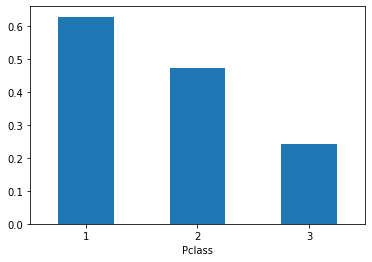

In [8]:
train.groupby('Pclass')['Survived'].mean().plot(kind="bar", rot = 0)

In [9]:
train.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

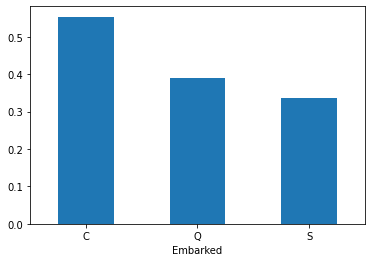

In [10]:
train.groupby('Embarked')['Survived'].mean().plot(kind="bar", rot = 0)

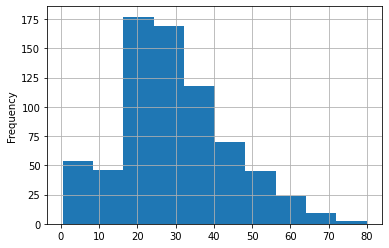

In [168]:
train['Age'].plot(kind='hist', bins = 10, grid = True) # bins : 구간수

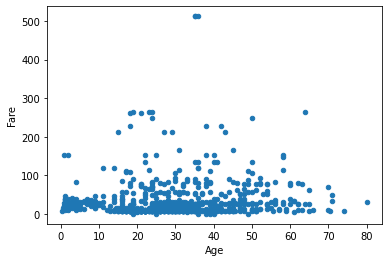

In [169]:
train.plot(x ='Age', y ='Fare', kind = 'scatter')

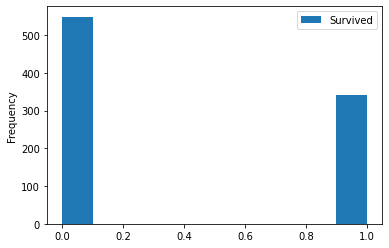

In [170]:
train.plot(x ='Age', y ='Survived', kind = 'hist')

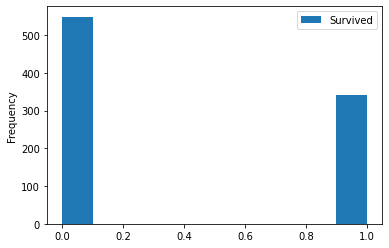

In [171]:
train.plot(x ='Fare', y ='Survived', kind = 'hist')

## 2. 데이터 전처리

### pd.Series.isna()
* 결측치 여부 확인
* True : 결측치, False : 결측치 아님

In [172]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [173]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [174]:
train.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [175]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [176]:
train['Age'].isnull().sum()

177

### pd.Dataframe.fillna()
* 결측치 컬럼, 처리할 값 명시
* 범주형 : 최빈값
* 수치형 : 평균, 중앙값, 최대값, 최소값

In [177]:
train['Age'] = train['Age'].fillna(train['Age'].median())

In [178]:
train['Age'].mean()

29.36158249158249

In [179]:
train['Age'].median()

28.0

In [180]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [181]:
train.isnull().sum().sum()

689

In [182]:
train['Embarked'].isna().sum()

2

In [183]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [184]:
train['Embarked'] = train['Embarked'].fillna('S') # Embarked 컬럼의 na를 'S'로 채움, S가 646으로 제일 많음

### pd.Dataframe.dropna()

In [185]:
#train['Cabin'] = train['Cabin'].dropna(axis = 0, inplace = True) # Embarked 행의 na를 날림

In [186]:
#train['Cabin'] = train['Cabin'].dropna(axis = 1, inplace = True) # Embarked 열의 na를 날림

In [187]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [188]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [189]:
type(train[train['Cabin'].isna()]['Sex'].sum())

str

### pd.Series.map()
* Series 내 값을 변환할때 사용

In [190]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

In [191]:
train['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

## 변수 선택 및 모델 구축

In [192]:
X_train = train[['Sex', 'Pclass']]
y_train = train['Survived']

In [193]:
X_train

,Sex,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,1,3
889,0,1


In [194]:
X_test = test[['Sex','Pclass']]
# test['Survived'] test에는 'Survived' column이 없음

In [195]:
X_test

,Sex,Pclass
0,0,3
1,1,3
2,0,2
3,0,3
4,1,3
...,...,...
413,0,3
414,1,1
415,0,3
416,0,3


In [196]:
lr = LogisticRegression()

In [197]:
dt = DecisionTreeClassifier()

## 모델 학습 및 검증

#### model.fit()
* 모델 학습

In [198]:
lr.fit(X_train, y_train)

LogisticRegression()

In [199]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

#### model.predict()
* 모델 예측

In [200]:
lr.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [201]:
dt.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [202]:
lr_pred = lr.predict(X_test)

In [203]:
dt_pred = dt.predict(X_test)

#### model.predict_proba()
* 모델 예측 확률

In [ ]:
lr.predict_proba(X_test)

In [ ]:
dt.predict_proba(X_test)

In [206]:
lr.predict_proba = lr.predict_proba(X_test)[:, :1]

In [207]:
dt_pred_proba = dt.predict_proba(X_test)[:, :1]

#### pd.Dataframe.to_csv()
* csv 파일을 저장하는 함수

In [208]:
submission['Survived'] = lr_pred 

In [209]:
submission.to_csv('/content/drive/MyDrive/logistic_regression_pred.csv', index = False)

In [210]:
submission['Survived'] = dt_pred 

In [211]:
submission.to_csv('/content/drive/MyDrive/decision_tree_pred.csv', index = False)

## 기타

#### 다른 모델 import

In [212]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

### Cross Validation (K-fold)

In [213]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
import numpy as np

### 기타 모델 학습

In [214]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.7752809  0.78651685 0.75280899 0.79775281 0.78651685
 0.78651685 0.78651685 0.79775281 0.79775281]


In [215]:
clf = KNeighborsClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.7752809  0.68539326 0.76404494 0.79775281 0.76404494
 0.78651685 0.78651685 0.74157303 0.79775281]


In [216]:
# kNN Score
round(np.mean(score)*100, 2)

76.99

In [217]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.7752809  0.76404494 0.75280899 0.79775281 0.78651685
 0.78651685 0.76404494 0.74157303 0.69662921]


In [218]:
# decision tree Score
round(np.mean(score)*100, 2)

76.65

In [219]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.7752809  0.76404494 0.75280899 0.79775281 0.78651685
 0.79775281 0.76404494 0.74157303 0.69662921]


In [220]:
# Random Forest Score
round(np.mean(score)*100, 2)

76.76

In [221]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.7752809  0.78651685 0.75280899 0.79775281 0.78651685
 0.78651685 0.78651685 0.79775281 0.79775281]


In [222]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.67

In [223]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.7752809  0.76404494 0.75280899 0.79775281 0.78651685
 0.78651685 0.76404494 0.74157303 0.69662921]


In [224]:
# SVM Score
round(np.mean(score)*100, 2)

76.65